# Week 6 Practice

## Question 1

Linear Regression

1. Preprocess Test data and get predictions

2. Compute Mean Abolute Error, Mean Square error for test data
                                                
3. Implement Ridge and Lasso Regression and then compute the following metrics on test data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [4]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week']

In [5]:
#Handling null values in categorical columns
data = data.dropna()

In [6]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [7]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [8]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [9]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4251, 25)

In [10]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [11]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2975, 24)
Validation Set Dimensions: (1276, 24)


In [12]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [13]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [14]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
reg.coef_


array([  165.65979194,    56.76497198,   208.06585774,   236.86277684,
          83.25685656,   -44.59643341,    39.99927769, -2342.93988836,
         947.04315641,   782.06586877,   565.64940065,   461.02516609,
         857.27660648,   695.60698036,    50.25296923,   874.95408543,
         652.68808672,  3414.51886161,   363.6015347 ,   -56.60924473,
         207.93250347,   225.31289523,  -303.31070901,  -163.17479309])

In [16]:
reg.intercept_


6217.191524321198

In [17]:
mean_absolute_error(y_train,reg.predict(X_train))

860.2824526666652

In [18]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1213.5776158275949

In [19]:
#Q1 and Q2
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

857.8297790969871 1214.7842987127328


In [20]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,-0.035202,0.210815,-0.031022,-0.009640,0.498433
std,0.985957,0.408047,0.991713,0.973596,0.500194
min,-2.252083,0.000000,-2.202638,-0.625214,0.000000
25%,-0.642671,0.000000,-0.495707,-0.625214,0.000000
50%,0.070183,0.000000,-0.495707,-0.625214,0.000000
75%,0.249911,0.000000,0.138212,-0.024241,1.000000
max,2.751906,1.000000,2.349179,2.379650,1.000000


858.2802110598824 1215.4131803285718


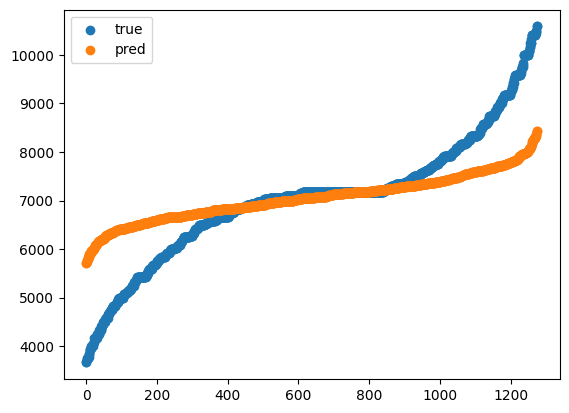

In [21]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [22]:
ridge.coef_

array([  165.10570036,    58.50701345,   206.68082549,   237.34921262,
          86.67889665,   -43.33182386,    31.79117069, -1188.04417046,
         905.09661839,   744.17505784,   494.49138287,   423.60158128,
         813.82929101,   653.60965823,    12.37463489,   417.76491042,
         308.80025708,  1686.7267882 ,   362.77864121,   -52.97328733,
         205.36705536,   219.32770555,  -298.05743126,  -161.96780653])

860.2192250756023 1217.4301159306517


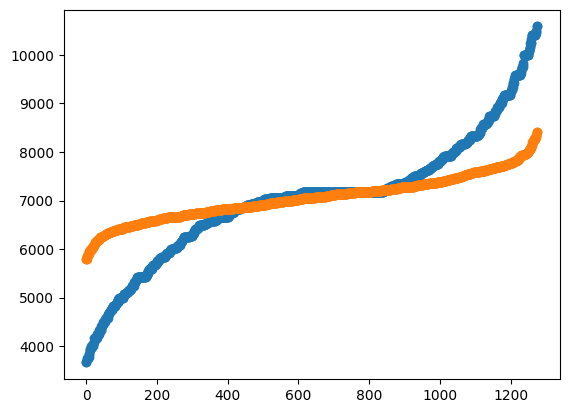

In [23]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [24]:
lasso.coef_

array([ 164.15540784,   57.67589763,  204.89988992,  236.59986097,
         86.93901919,  -11.13542456,    0.        ,   -0.        ,
        811.2569117 ,  659.34292   ,  235.32236946,  336.82495771,
        714.65972831,  561.21884177,   -4.82307758,    0.        ,
          0.        ,  324.55643463,  346.38538605,   -0.        ,
        184.6520091 ,  167.49924684, -253.98076135, -150.67568405])

## Question 2

1. Compute errors on test sets

2. Play with different parameter of decision trees and random forests and see the impact on train and test error

3. [OPTIONAL] implement cross validation and get best hyperparameters

In [27]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

617.9315208167388

In [31]:
mean_absolute_error(y_test,decisiontree.predict(X_test))

867.1817531197617

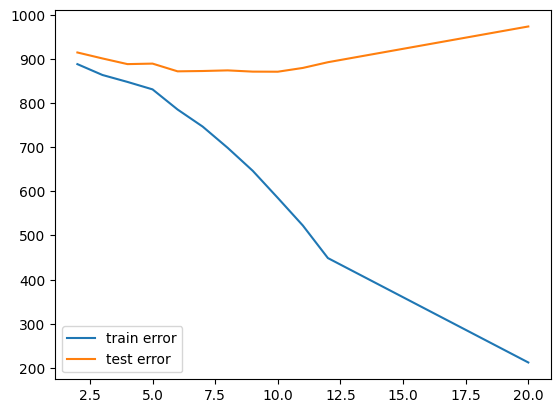

In [32]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [33]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

394.28608452173364

In [34]:
mean_absolute_error(y_test,randomf.predict(X_test))

796.831478449925

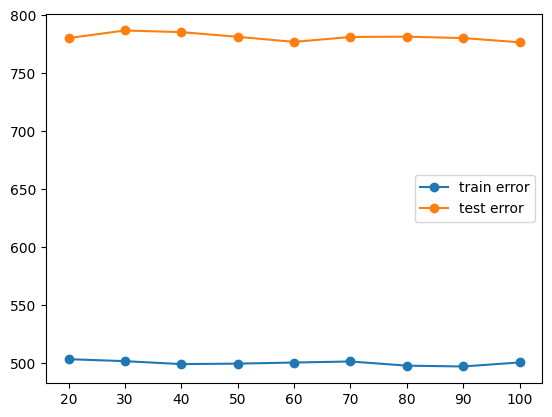

In [35]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [36]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)


,feature,importance
0,job_years,26.855896
2,hours_per_week,16.280321
3,telecommute_days_per_week,9.140915
4,certifications,7.059995
23,is_education_computer_related_Yes,6.323166
1,is_manager,5.288329
18,education_Bachelors (4 years),4.631981
9,job_title_DBA,4.290869
20,education_Masters,3.756742
11,job_title_Developer,3.363502
